In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['PM2.5y1', 'PM1y1', 'NOy1','NO2y1', 'NOxy1', 'NH3y1', 'COy1','Ozoney1','PM2.5y2', 'PM1y2', 'NOy2','NO2y2', 'NOxy2', 'NH3y2', 'COy2','Ozoney2','PM2.5y3', 'PM1y3', 'NOy3','NO2y3', 'NOxy3', 'NH3y3', 'COy3','Ozoney3','year', 'month', 'day']]
Y1 = df['NO2']

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=12)

In [9]:
grad_boost = GradientBoostingRegressor(n_estimators=2500,
                                      max_depth=8,
                                      max_features='log2',
                                      min_samples_split=7,
                                      min_samples_leaf=9,
                                      learning_rate=0.02)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.02, max_depth=8, max_features='log2',
                          min_samples_leaf=9, min_samples_split=7,
                          n_estimators=2500)

In [10]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9999773007289451

Score on test data: 0.6133334791035703

Root Mean Squared Error: 15.589936077835297

Overall model accuracy: 0.6133334791035703


In [11]:
test=data.loc['207':'259']
X=test[['PM2.5y1', 'PM1y1', 'NOy1','NO2y1', 'NOxy1', 'NH3y1', 'COy1','Ozoney1','PM2.5y2', 'PM1y2', 'NOy2','NO2y2', 'NOxy2', 'NH3y2', 'COy2','Ozoney2','PM2.5y3', 'PM1y3', 'NOy3','NO2y3', 'NOxy3', 'NH3y3', 'COy3','Ozoney3','year', 'month', 'day']]
X

,PM2.5y1,PM1y1,NOy1,NO2y1,NOxy1,NH3y1,COy1,Ozoney1,PM2.5y2,PM1y2,...,PM1y3,NOy3,NO2y3,NOxy3,NH3y3,COy3,Ozoney3,year,month,day
207,302.818571,428.861429,125.535714,76.847143,144.901429,32.607143,2.175714,81.874286,217.428571,371.975714,...,416.398571,100.627143,83.730000,212.015714,56.007143,2.998571,19.008571,2019,12,29
208,316.292857,456.537143,109.870000,52.067143,117.267143,29.011429,1.537714,44.231429,264.292857,452.655714,...,332.717143,98.832857,67.225714,194.864286,57.234286,3.004286,12.377143,2020,1,5
209,241.932857,349.680000,84.832857,58.215714,100.144286,31.015714,0.970000,16.544286,191.864286,344.172857,...,282.434286,101.944286,57.842857,190.755714,48.108571,2.867143,26.052857,2020,1,12
210,253.915714,405.144286,117.140000,58.545714,126.631429,28.408571,1.768000,16.497143,237.660000,405.398571,...,346.604286,94.412857,75.028571,195.770000,43.388571,2.740000,36.645714,2020,1,19
211,128.998571,223.215604,34.865714,44.648571,52.171429,23.565714,2.566000,18.280000,173.172857,302.185714,...,237.858571,49.015714,68.434286,127.910000,44.487143,1.844286,33.900000,2020,1,26
212,187.365714,225.330769,47.905714,49.550000,65.417143,23.558571,2.305429,15.304286,143.550000,284.925714,...,251.350000,74.012857,62.091429,156.391429,42.347143,2.127143,28.347143,2020,2,2
213,146.527143,198.920769,65.595714,50.381429,80.275714,22.507143,1.334286,13.075714,193.068571,331.052857,...,328.171429,153.021429,66.960000,268.622857,39.584286,2.754286,30.995000,2020,2,9
214,193.267143,333.581429,73.142857,72.708571,98.288571,27.225714,1.971429,13.350000,109.957143,204.577143,...,279.338571,50.672857,67.874286,129.678571,30.340000,1.890000,40.731429,2020,2,16
215,110.288571,192.155714,68.825714,73.708571,96.087143,27.742857,1.424286,15.944286,166.732857,330.682857,...,275.608571,34.234286,82.401429,120.168571,37.265714,1.715714,52.620000,2020,2,23
216,108.875000,172.547857,86.743571,88.330000,117.698571,27.334286,1.810714,12.685714,109.975714,228.510000,...,280.377143,38.925714,62.438571,108.778571,26.370000,1.704286,61.414286,2020,3,1


In [12]:
predict=grad_boost.predict(X)

In [13]:
predict

array([50.59473936, 50.42479071, 60.68190179, 59.43501996, 67.06277704,
       65.24663778, 66.46193524, 55.7397598 , 69.79139299, 62.51715427,
       72.31433606, 70.31395573, 66.42797061, 71.22478007, 72.62647071,
       69.56419583, 62.57272711, 71.51782458, 63.60463995, 72.61820172,
       67.87085749, 64.14645471, 56.1867577 , 57.61011424, 55.81041616,
       51.5932668 , 55.87440774, 42.25537306, 61.82145144, 37.62001483,
       39.38209576, 31.34689561, 28.97272914, 27.78180887, 34.1218326 ,
       29.50701136, 39.88541459, 36.81495177, 38.84744587, 41.70410336,
       55.53695766, 58.84042681, 62.50628014, 68.46981019, 56.92488339,
       63.17903802, 54.08277645, 61.5977819 , 58.50936207, 60.51673447,
       69.43828096, 76.29823864, 70.21660358])

In [14]:
dates=data.loc['207':'259','From Date']

In [15]:
X['From Date']=dates.values

In [16]:
X.columns

Index(['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'COy1',
       'Ozoney1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2',
       'COy2', 'Ozoney2', 'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3',
       'NH3y3', 'COy3', 'Ozoney3', 'year', 'month', 'day', 'From Date'],
      dtype='object')

In [17]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [18]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [19]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [20]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

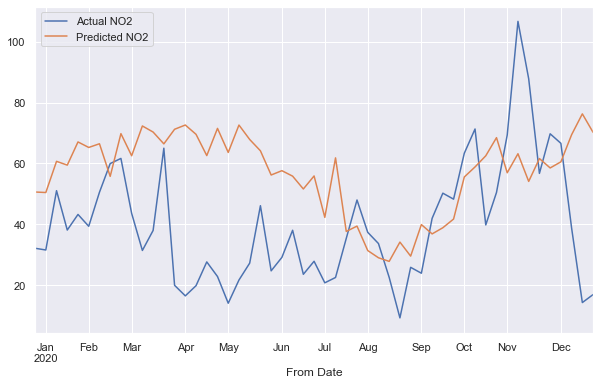

In [21]:
test['NO2'].plot(legend=True, label='Actual NO2', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NO2')

In [22]:
np.sqrt(mean_squared_error(test['NO2'],X['pred']))

28.763782990268847

In [23]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 12.140042702279837
MSE: 243.0461069109906
RMSE: 15.589936077835297
R-Squared: 0.6133334791035703


In [24]:
mae = metrics.mean_absolute_error(test['NO2'],X['pred'])
mse = metrics.mean_squared_error(test['NO2'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NO2'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 23.560992664221025
MSE: 827.3552119112794
RMSE: 28.763782990268847
R-Squared: -1.1101229651266067


In [25]:
import pickle
filename = 'NO2_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [26]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.6133334791035703


# 3rd plot

In [27]:
testcase = pd.DataFrame()

In [28]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [29]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [30]:
testcase

,test,pred,Corrected
85,38.474286,30.296740,45.886676
143,87.121429,51.994013,67.583950
207,32.095714,50.594739,35.004803
203,40.572857,72.014674,56.424738
191,42.635714,24.096530,39.686467
11,75.338571,63.802930,79.392866
6,83.024286,83.388087,67.798151
196,60.690000,64.974762,49.384826
32,38.097143,35.109527,50.699463
31,43.575714,35.091484,50.681420


In [31]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [32]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8181120418125288

In [33]:
test2020=pd.DataFrame()

In [34]:
test2020['test']=test['NO2']
test2020['pred']=X['pred']

In [35]:
test2020.index=test.index

In [36]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

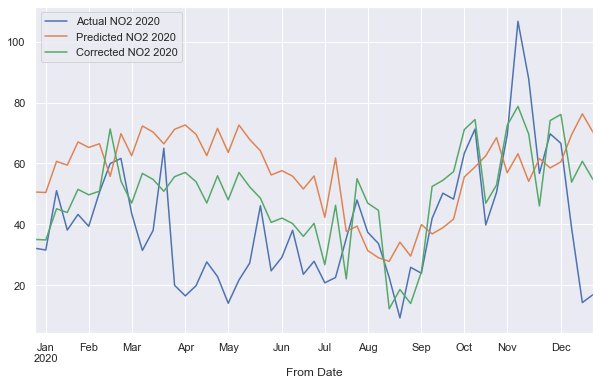

In [37]:
test2020['test'].plot(legend=True, label='Actual NO2 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NO2 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NO2 2020')

In [38]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

-0.49835776093288753